# Lecture 2

In [148]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import tellurium as te

In [2]:
FONTSIZE  = 18

## Phase Portrait

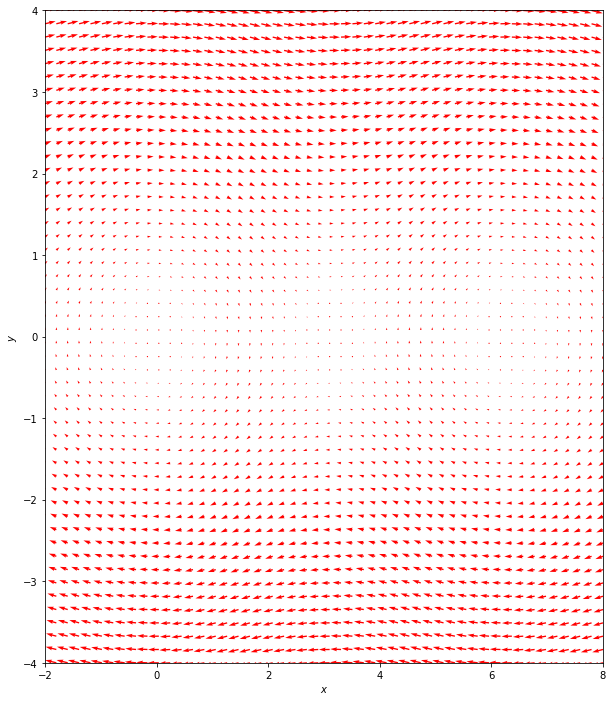

In [86]:
def plotPhase(xlim, ylim, dFunc, numPt=20):
    """
    Constructs a phase plot for a system of 2-d system of differential equations.

    Parameters
    ----------
    xlim: tuple
        lower and upper value of x
    ylim: tuple
        lower and upper value of y
    dFunc: Function
        args:
            tuple of current x, y
    numPt: int
        number of points in the grid
    """
    # Create the mesh
    xGrid = np.linspace(xlim[0], xlim[1], numPt)
    yGrid = np.linspace(ylim[0], ylim[1], numPt)
    xMesh, yMesh = np.meshgrid(xGrid, yGrid)
    xVals, yVals = np.zeros(xMesh.shape), np.zeros(yMesh.shape)
    # Populate mesh with values
    numX, numY = yMesh.shape
    for xIdx in range(numX):
        for yIdx in range(numY):
            x = xMesh[xIdx, yIdx]
            y = yMesh[xIdx, yIdx]
            yprime = dFunc([x, y])
            xVals[xIdx, yIdx] = yprime[0]
            yVals[xIdx, yIdx] = yprime[1]
    # Construct quiver plot
    fig, ax = plt.subplots(1, figsize=(10, 12))
    quiverPlt = ax.quiver(xMesh, yMesh, xVals, yVals, color='r')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
def dFunc(Y):
    y1, y2 = Y
    return [y2, -np.sin(y1)]
numPt = 50
xlim = [-2, 8]
ylim = [-4, 4]

plotPhase(xlim, ylim, dFunc, numPt=numPt)

## 1-dimensional System

$\frac{dS_1}{dt} = -(k_f +k_r)S_1 + k_r S_T$

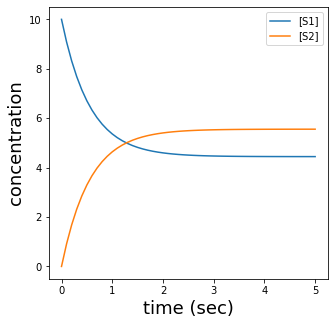

In [212]:
C_k_f = 1
C_k_r = 0.8
C_S_T = 10
model = """
S1 -> S2; k_f*S1
S2 -> S1; k_r*S2

k_f = 0
k_r = 0
S1 = 0
S2 = 0
"""
rr = te.loada(model)
rr.k_f = C_k_f
rr.k_r = C_k_r
rr.S1 = C_S_T
data = rr.simulate()
fig, ax = plt.subplots(figsize=(5, 5))
_ = ax.plot(data[:,0], data[:, 1:])
ax.set_ylabel("concentration", fontsize=FONTSIZE)
ax.set_xlabel("time (sec)", fontsize=FONTSIZE)
_ = ax.legend(data.colnames[1:])

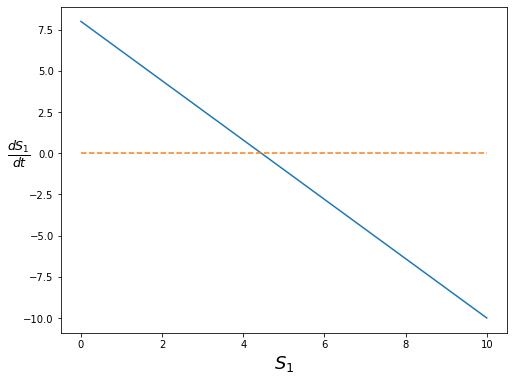

In [3]:
values = np.array([0.1*v for v in range(0, 10*C_S_T+1)])
def ds(s):
     return np.array(-(C_k_f + C_k_r)*s + C_k_r*C_S_T)
fig, ax = plt.subplots(1, figsize=(8, 6))
ax.plot(values, ds(values))
ax.set_xlabel(r'$S_1$', fontsize=FONTSIZE)
ax.set_ylabel(r'$\frac{dS_1}{dt}$', fontsize=FONTSIZE, rotation=0)
_ = ax.plot([0, 10], [0, 0], linestyle="--")

$\frac{dS_1}{dt} = -(k_f +k_r)S_1(S_T - S_1) + k_r S_T = $

In [19]:
sy.init_printing()
dS1, S1, k_f, k_r, S_T, k_2, k_3, k_0, S2 = sy.symbols("dS1 S1 k_f k_r S_T k_2 k_3 k_0 S2")

In [10]:
f_dS1 = -(k_f + k_r)*S1*(S_T - S1) + (k_r)*S_T
sy.simplify(f_dS1)

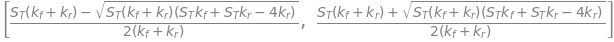

In [103]:
ans = sy.solve(f_dS1, S1)
ans

In [155]:
ans[0].evalf(subs={S_T: C_S_T, k_f: C_k_f, k_r: C_k_r})

## 2-d Linear System
- $\emptyset \rightarrow S_1$; $k_0$
- $S_1 \leftrightarrow S_2$; $-k_f S_1 + k_r S_2$
- $S_1 \rightarrow 2 S_1$; $k_2 S_1$
- $S_2 \rightarrow \emptyset$; $k_3 S_2$

$\frac{S_1}{dt} = k_0 -k_f S_1 + k_r S_2 + k_2 S_1 = k_0 + S_1 (k_2 - k_f) + k_r S_2$

$\frac{S_2}{dt} = k_f S_1 - k_r S_2 - k_3 S_2 = k_f S_1 - S_2 (k_r + k_3)$



The model turns unstable when k2 transitions from .5 to .6.

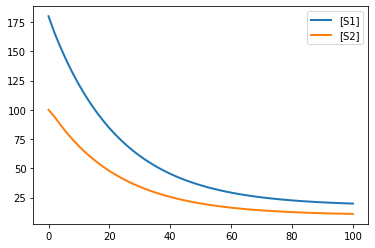

In [196]:
model = """
J0:  -> S1; k_0
J1: S1 -> S2; k_f*S1
J2: S2 -> S1; k_r*S2
J3: S1 -> 2 S1; k_2*S1
J4: S2 -> ; k_3*S2

k_0 = 1
k_2 = 0.5
k_3 = 1
k_f = 1.0
k_r = 0.8
S1 = 180
S2 = 100

//at (time > 10): S1 = 200
"""
rr = te.loada(model)
#rr.k_f = C_k_f
#rr.k_r = C_k_r
#rr.S_T = C_S_T
data = rr.simulate(0, 100)
rr.plot(data)

In [95]:
dS1 = k_0 + S1*(k_2 - k_f) + k_r*S2
dS2 = k_f*S1 - S2*(k_3 + k_r)

In [190]:
C_k_f = 1
C_k_r = 0.8
C_k_0 = 1
C_k_2 = .55
C_k_3 = 1
def dFunc(Svec):
    s1, s2 = Svec
    ds1 = dS1.subs({k_0: C_k_0, S1: s1, S2: s2, k_2: C_k_2, k_f: C_k_f, k_r: C_k_r})
    ds2 = dS2.subs({k_0: C_k_0, S1: s1, S2: s2, k_2: C_k_2, k_f: C_k_f, k_r: C_k_r, k_3: C_k_3})
    return (ds1, ds2)

In [191]:
subDct = {k_0: C_k_0, k_2: C_k_2, k_f: C_k_f, k_r: C_k_r, k_3: C_k_3}
def findFixedPoints(expressions, subDct, vars):
    newExpressions = []
    for expression in expressions:
        newExpressions.append(expression.subs(subDct))
    return sy.solve(newExpressions, vars)

findFixedPoints([dS1, dS2], subDct, [S1, S2])

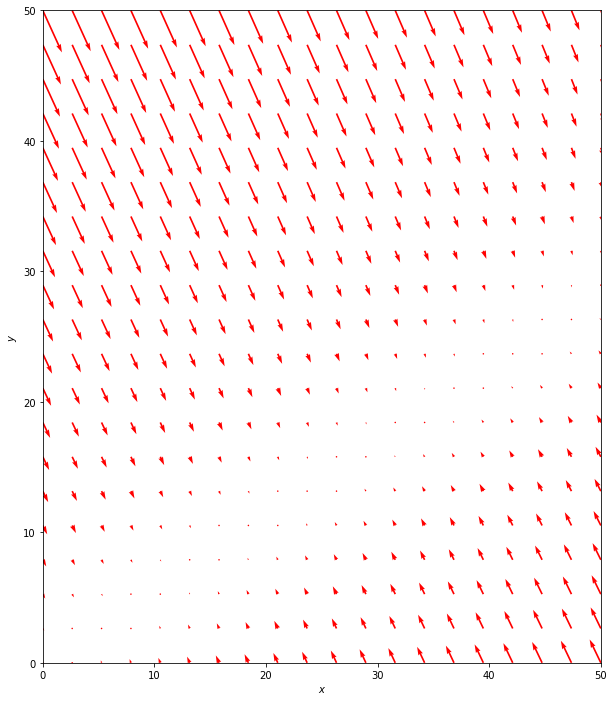

In [147]:
plotPhase([0, 50], [0, 50], dFunc, numPt=20)

In [115]:
xx = k_0 + S1
xx.subs({k_0: 1})

In [117]:
dS1.subs({k_0:1, k_2:1, k_f:1, k_r: 1})

In [102]:
dS1.find(k_0)

In [43]:
vMat = sy.Matrix([dS1, dS2])
vMat

⎡S₁⋅(k₂ - k_f) + S₂⋅kᵣ + k₀⎤
⎢                          ⎥
⎣  S₁⋅k_f - S₂⋅(k₃ + kᵣ)   ⎦

In [44]:
jacobian = vMat.jacobian((S1, S2))
jacobian

⎡k₂ - k_f     kᵣ   ⎤
⎢                  ⎥
⎣  k_f     -k₃ - kᵣ⎦

In [48]:
det = sy.simplify(jacobian.det())
det

Note that if $k_2 = 0$, then the determinant is always positive.

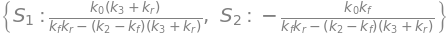

In [33]:
fixedPt = sy.solve([dS1, dS2], [S1, S2])
fixedPt

## Lac Operon

In [242]:
dI_int, a, I_ext, I_int, P, b, c, e, dP, I_int_str, P_str = sy.symbols("dI_int a I_ext I_int P b c e dP I_int_str P_str")
dP = c*I_int - e*P
dI_int = a*(I_ext - I_int)*P - b*I_int

In [217]:
fixedPoints = sy.solve([dP, dI_int], [I_int, P])

In [240]:
fixedPoints[1]

In [243]:
subDct = {a:1, b:0.1, c:1, e:0.5, I_ext:3}
C_I_int_str, C_P_str = [s.evalf(subs=subDct) for s in fixedPoints[1]]
subDct[I_int_str] = C_I_int_str
subDct[P_str] = C_P_str

In [245]:
# Jacobian
jacobian = sy.Matrix([dI_int, dP])
jacobian = jacobian.jacobian([I_int, P])
linearization = jacobian.subs({P: P_str, I_int:I_int_str})

In [246]:
linearization.subs(subDct)

⎡-6.0  0.0499999999999998⎤
⎢                        ⎥
⎣ 1           -0.5       ⎦

In [248]:
2.95*4

## Nonlinear System

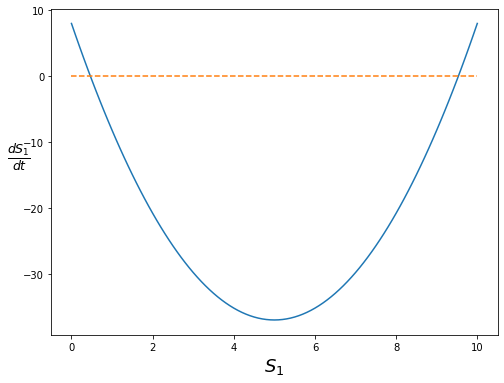

In [8]:
values = np.array([0.1*v for v in range(0, 10*C_S_T+1)])
def ds(s):
     return np.array(-(C_k_f + C_k_r)*s*(C_S_T-s) + C_k_r*C_S_T)
fig, ax = plt.subplots(1, figsize=(8, 6))
ax.plot(values, ds(values))
ax.set_xlabel(r'$S_1$', fontsize=FONTSIZE)
ax.set_ylabel(r'$\frac{dS_1}{dt}$', fontsize=FONTSIZE, rotation=0)
_ = ax.plot([0, 10], [0, 0], linestyle="--")

In [257]:
dx3, dx1, x1, ll, k1, y1, y2, x2, dx2, k2 = sy.symbols("dx3, dx1, x1, ll, k1, y1, y2, x2, dx2, k2 ")

In [258]:
dx1 = ll - k1*y1*(x1/(1 + x1))
dx2 = k1*y1*(x1/(1 + x1)) - k2*y2*(x2/1+x2)

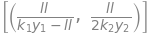

In [259]:
fixedPoints = sy.solve([dx1, dx2], [x1, x2])
fixedPoints

In [261]:
subDct = {x2: fixedPoints[0][1]}
dx3 = k2*y2*(x2/1+x2)
dx3.evalf(subs=subDct)